In [68]:
import pandas as pd
import warnings
from sklearn.exceptions import ConvergenceWarning
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")

In [70]:
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

In [71]:
df.shape

(3140, 108)

In [72]:
df.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.00000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,1

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [74]:
# Ignorar las advertencias de convergencia
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [75]:
df.value_counts()

fips   TOT_POP  0-9    0-9 y/o % of total pop  19-Oct  10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  30-39 y/o % of total pop  40-49  40-49 y/o % of total pop  50-59  50-59 y/o % of total pop  60-69  60-69 y/o % of total pop  70-79  70-79 y/o % of total pop  80+    80+ y/o % of total pop  White-alone pop  % White-alone  Black-alone pop  % Black-alone  Native American/American Indian-alone pop  % NA/AI-alone  Asian-alone pop  % Asian-alone  Hawaiian/Pacific Islander-alone pop  % Hawaiian/PI-alone  Two or more races pop  % Two or more races  POP_ESTIMATE_2018  N_POP_CHG_2018  GQ_ESTIMATES_2018  R_birth_2018  R_death_2018  R_NATURAL_INC_2018  R_INTERNATIONAL_MIG_2018  R_DOMESTIC_MIG_2018  R_NET_MIG_2018  Less than a high school diploma 2014-18  High school diploma only 2014-18  Some college or associate's degree 2014-18  Bachelor's degree or higher 2014-18  Percent of adults with less than a high school diploma 2014-18  Percent of adults with a high school diploma only

In [76]:
# La siguiente línea selecciona solo las columnas que son numéricas (es decir, int o float)
# del DataFrame 'datos_limpios'. Esta selección se hace usando el método 'select_dtypes',
# y especificamos que solo queremos las columnas de tipo numérico con 'include=[np.number]'.
columnas_numericas = df.select_dtypes(include=[np.number])

In [77]:
# Luego, seleccionamos las columnas que no son numéricas, es decir, las columnas categóricas.
# Las columnas categóricas suelen ser de tipo 'object' (cadenas de texto) o 'category' (categorías).
# Nuevamente usamos 'select_dtypes' pero esta vez especificamos 'include=['object', 'category']'.
columnas_categoricas = df.select_dtypes(include=['object', 'category'])

In [78]:
# Ahora, queremos convertir las columnas categóricas a un formato numérico.
# 'pd.get_dummies' es una función que hace esta conversión. Por ejemplo, si tienes una columna
# llamada 'color' con valores 'rojo' y 'verde', esta función creará dos nuevas columnas:
# 'color_rojo' y 'color_verde', donde cada fila tendrá un 1 o un 0 dependiendo del valor original.
# 'drop_first=True' es un argumento que le dice a la función que elimine la primera columna categórica
# generada para evitar redundancia (porque si sabes que 'color_rojo' es 0, automáticamente sabes que 'color_verde' es 1).
categ_bin = pd.get_dummies(columnas_categoricas, drop_first=True)

In [79]:
# Una vez que hemos procesado las columnas categóricas y numéricas por separado,
# queremos combinarlas nuevamente en un solo DataFrame.
# 'pd.concat' es una función que une (concatena) varios DataFrames.
# Le pasamos una lista de los DataFrames que queremos unir (en este caso, 'columnas_numericas' y 'categ_bin').
# 'axis=1' especifica que queremos unir los DataFrames lado a lado, es decir, añadir columnas.
df_new = pd.concat([columnas_numericas, categ_bin.astype(int)], axis=1)

In [80]:
df_new.head()

fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0  1001    55601   6787               12.206615    7637   
1  1003   218022  24757               11.355276   26913   
2  1005    24881   2732               10.980266    2960   
3  1007    22400   2456               10.964286    2596   
4  1009    57840   7095               12.266598    7570   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   

   30-39 y/o % of total pop  40-49  40-49 y/o % of total pop  50-59  \
0                 12.749771   7582                 13.636445   7738   
1                 11.564429  27338                 12.539102  29986   
2                 12.865239   3074                 12.354809   3278   
3                 13.897321   3038                 13.562500   3115   
4                 11.901798   7474                 12.921853   7844   

   50-59 y/o % of total pop  60-69  60-69 y/o % of total pop  70-79  \
0                 13.917016   5826                 10.478229   4050   
1                 13.753658  29932                 13.728890  20936   
2                 13.174712   3076                 12.362847   2244   
3                 13.906250   2545                 11.361607   1723   
4                 13.561549   6965                 12.041840   4931   

   70-79 y/o % of total pop   80+  80+ y/o % of total pop  White-alone pop  \
0                  7.284042  2014                3.622237            42660   
1                  9.602701  9368                4.296814           190301   
2                  9.018930  1048                4.212049            12209   
3                  7.691964   785                3.504464            17211   
4                  8.525242  2335                4.036999            55456   

   % White-alone  Black-alone pop  % Black-alone  \
0      76.725239            10915      19.630942   
1      87.285228            19492       8.940382   
2      49.069571            12042      48.398376   
3      76.834821             4770      21.294643   
4      95.878285              950       1.642462   

   Native American/American Indian-alone pop  % NA/AI-alone  Asian-alone pop  \
0                                        267       0.480207              681   
1                                       1684       0.772399             2508   
2                                        164       0.659137              113   
3                                         98       0.437500               53   
4                                        378       0.653527              185   

   % Asian-alone  Hawaiian/Pacific Islander-alone pop  % Hawaiian/PI-alone  \
0       1.224798                                   62             0.111509   
1       1.150343                                  146             0.066966   
2       0.454162                                   46             0.184880   
3       0.236607                                   26             0.116071   
4       0.319848                                   70             0.121024   

   Two or more races pop  % Two or more races  POP_ESTIMATE_2018  \
0                   1016             1.827305              55601   
1                   3891             1.784682             218022   
2                    307             1.233873              24881   
3                    242             1.080357              22400   
4                    801             1.384855              57840   

   N_POP_CHG_2018  GQ_ESTIMATES_2018  R_birth_2018  R_death_2018  \
0             158                455          11.8           9.6   
1            5403               2190          10.5          10.3   
2            -277     

In [81]:
pd.set_option("display.max_columns", None)

In [82]:
df_new

fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0      1001    55601   6787               12.206615    7637   
1      1003   218022  24757               11.355276   26913   
2      1005    24881   2732               10.980266    2960   
3      1007    22400   2456               10.964286    2596   
4      1009    57840   7095               12.266598    7570   
...     ...      ...    ...                     ...     ...   
3135  56037    43051   6104               14.178532    6326   
3136  56039    23081   2384               10.328842    2185   
3137  56041    20299   3121               15.375142    3205   
3138  56043     7885    858               10.881420    1113   
3139  56045     6967    780               11.195637     779   

      10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                    13.735364   6878                 12.370281   7089   
1                    12.344167  23579                 10.814964  25213   
2                    11.896628   3268                 13.134520   3201   
3                    11.589286   3029                 13.522321   3113   
4                    13.087828   6742                 11.656293   6884   
...                        ...    ...                       ...    ...   
3135                 14.694200   5359                 12.448027   6577   
3136                  9.466661   2967                 12.854729   4093   
3137                 15.788955   2153                 10.606434   2702   
3138                 14.115409    715                  9.067850    903   
3139                 11.181283    681                  9.774652    906   

      30-39 y/o % of total pop  40-49  40-49 y/o % of total pop  50-59  \
0                    12.749771   7582                 13.636445   7738   
1                    11.564429  27338                 12.539102  29986   
2                    12.865239   3074                 12.354809   3278   
3                    13.897321   3038                 13.562500   3115   
4                    11.901798   7474                 12.921853   7844   
...                        ...    ...                       ...    ...   
3135                 15.277229   5334                 12.389956   5261   
3136                 17.733200   3423                 14.830380   2928   
3137                 13.311001   2390                 11.773979   2434   
3138                 11.452124    900                 11.414077   1085   
3139                 13.004162    734                 10.535381    986   

      50-59 y/o % of total pop  60-69  60-69 y/o % of total pop  70-79  \
0                    13.917016   5826                 10.478229   4050   
1                    13.753658  29932                 13.728890  20936   
2                    13.174712   3076                 12.362847   2244   
3                    13.906250   2545                 11.361607   1723   
4                    13.561549   6965                 12.041840   4931   
...                        ...    ...                       ...    ...   
3135                 12.220390   4943                 11.481731   2198   
3136                 12.685759   2875                 12.456133   1569   
3137                 11.990738   2554                 12.581901   1233   
3138                 13.760304   1118                 14.178821    741   
3139                 14.152433   1145                 16.434620    560   

      70-79 y/o % of total pop   80+  80+ y/o % of total pop  White-alone pop  \
0                     7.284042  2014                3.622237            42660   
1                     9.602701  9368                4.296814           190301   
2                     9.018930  1048                4.212049            12209   
3                     7.691964   785                3.504464            17211   
4                     8.525242  2335                4.036999            55456   
...                        ...   ...                     ...              ...   
3135            

In [83]:
# Definimos X e y
X = df_new.drop(columns=['diabetes_prevalence', 'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI'], axis=1)
y = df_new['diabetes_prevalence']
# Formamos los conjuntos de entrenamiento y de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

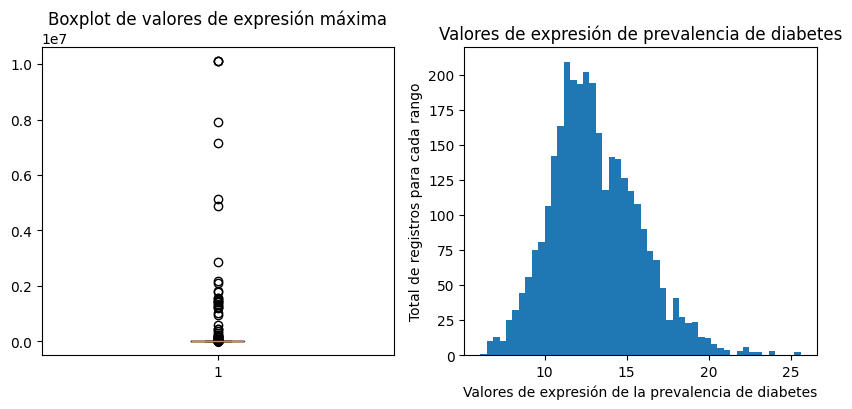

In [84]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df_new.max())
plt.title('Boxplot de valores de expresión máxima')
plt.subplot(1, 2, 2)
plt.hist(y,50)
plt.xlabel('Valores de expresión de la prevalencia de diabetes')
plt.ylabel('Total de registros para cada rango')
plt.title('Valores de expresión de prevalencia de diabetes')
plt.show()

In [85]:

# Imagina que tienes bloques de construcción de diferentes tamaños y formas.
# Para hacer una torre, necesitas que los bloques estén alineados perfectamente.
# Lo mismo sucede con los datos antes de usarlos para construir un modelo.
# Crea una "herramienta de escala" llamada 'scaler'. Esta herramienta se asegura de que todos los datos (bloques)
# estén en una escala similar, lo cual es importante para que el modelo los trate de forma justa.
scaler = StandardScaler()
# Ahora, vamos a usar la herramienta en nuestros datos de entrenamiento.
# Primero, la herramienta 'aprende' cuál es el tamaño medio de los bloques y cómo debe cambiarlos.
# Luego, 'transforma' nuestros datos de entrenamiento, asegurándose de que todos estén en la escala correcta,
# como ajustar los bloques al mismo tamaño.
X_train_scaled = scaler.fit_transform(X_train)
# Ahora, necesitamos asegurarnos de que los bloques (datos) que usaremos para probar nuestro modelo (la torre)
# estén también al mismo tamaño que los que usamos para construirlo (entrenarlo).
# Usamos la misma herramienta de escala, pero esta vez NO la hacemos 'aprender' de nuevo,
# simplemente la usamos para 'transformar' los bloques de prueba al tamaño que aprendió con los bloques de entrenamiento.
X_test_scaled = scaler.transform(X_test)
# Ahora tanto los datos de entrenamiento como los de prueba están en la misma escala y listos para usarse en el modelo.

In [86]:
# Entrenamos un modelo de regresión lineal sin regularización
modelo_linear = LinearRegression().fit(X_train_scaled, y_train)
# Realizamos predicciones sobre el conjunto de entrenamiento y de testeo
entrenamiento_y_linear = modelo_linear.predict(X_train_scaled)
y_linear = modelo_linear.predict(X_test_scaled)

In [87]:
# Definimos la función get_metrics. Esta función recibirá cuatro argumentos:
# y_linear: son las predicciones del modelo para el conjunto de prueba (test set)
# y_test: son los valores verdaderos para el conjunto de prueba (test set)
# yhat_train: son las predicciones del modelo para el conjunto de entrenamiento (train set)
# y_train: son los valores verdaderos para el conjunto de entrenamiento (train set)
def get_metrics(y_linear, y_test, yhat_train, y_train):
  # Calculamos tres métricas para el conjunto de entrenamiento usando las predicciones y los valores verdaderos:
  # 1. R2 Score: es un número que indica qué tan bien las predicciones se acercan a los valores verdaderos.
  # 2. Median Absolute Error: es la mediana de los errores absolutos entre las predicciones y los valores verdaderos.
  # 3. Mean Absolute Percentage Error (MAPE): es el promedio del error porcentual entre las predicciones y los valores verdaderos.
  metrics_train = (
    r2_score(y_train, yhat_train),
    median_absolute_error(y_train, yhat_train),
    mean_absolute_percentage_error(y_train, yhat_train) * 100  # Multiplicamos por 100 para obtener un porcentaje.
  )
  # Hacemos lo mismo para el conjunto de prueba.
  metrics_test = (
    r2_score(y_test, y_linear),
    median_absolute_error(y_test, y_linear),
    mean_absolute_percentage_error(y_test, y_linear) * 100  # Multiplicamos por 100 para obtener un porcentaje.
  )
  # Calculamos la diferencia entre las métricas del conjunto de prueba y entrenamiento.
  # Esto nos da una idea de cómo el modelo generaliza sobre datos no vistos durante el entrenamiento.
  metrics_diff = list(map(lambda x: x[1] - x[0], zip(metrics_train, metrics_test)))
  # Creamos un DataFrame de pandas para presentar los resultados de una manera legible.
  # El DataFrame tendrá tres filas (una para el conjunto de entrenamiento, una para el conjunto de prueba y una para la diferencia)
  # y tendrá tres columnas correspondientes a las métricas R2, Median AE y MAPE.
  results = pd.DataFrame(
    data=[metrics_train, metrics_test, metrics_diff],
    columns=['R2', 'Median AE', 'MAPE'],
    index=['Train set', 'Test set', 'Diferencia']
  )
  # La función retorna el DataFrame creado.
  return results
# Esta sería una forma de usar la función, pero necesitarías tener los datos reales de y_linear, y_test, yhat_train y y_train:
# my_results = get_metrics(y_linear_predict, y_test_real, yhat_train_predict, y_train_real)
# print(my_results)

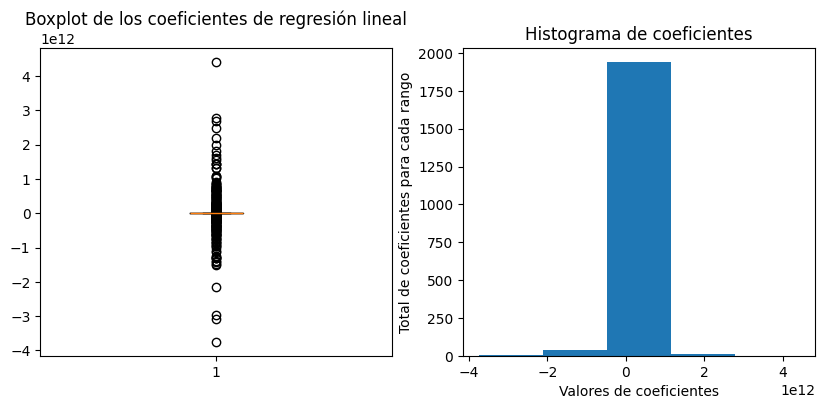

In [88]:
# Graficamos los coeficientes calculados
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(modelo_linear.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(modelo_linear.coef_,5)
plt.xlabel('Valores de coeficientes')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes')
plt.show()

In [89]:
# Métricas obtenidas para ambos conjuntos así como su diferencia
get_metrics(y_linear, y_test, entrenamiento_y_linear, y_train)

,R2,Median AE,MAPE
Train set,9.969882e-01,0.045599,7.684443e-01
Test set,-1.832044e+23,0.406172,2.594541e+12
Diferencia,-1.832044e+23,0.360573,2.594541e+12


In [90]:
# Entrenamos un modelo LassoCV debemos encontrar un buen valor de alpha (determina la intensidad de la regularización) mediante validación cruzada
m_lasso = LassoCV(alphas=np.logspace(-6, 6, 10), cv=5, random_state=42, n_jobs=-1).fit(X_train_scaled, y_train)
# Realizamos predicciones sobre el conjunto de entrenamiento y de testeo
yhat_train_lasso = m_lasso.predict(X_train_scaled)
yhat_lasso = m_lasso.predict(X_test_scaled)

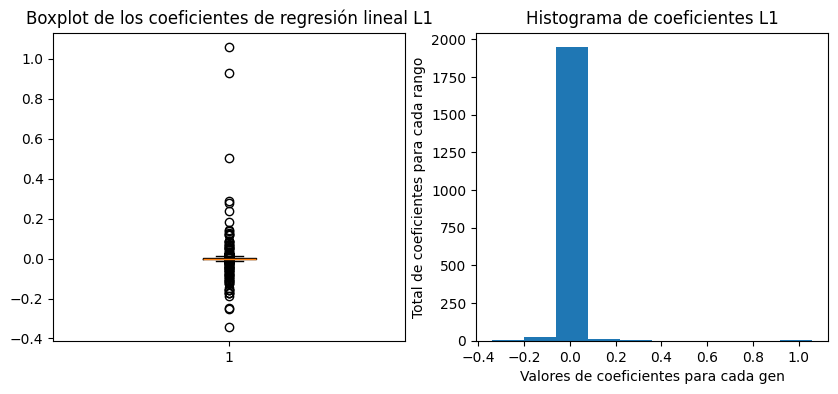

In [91]:
# Graficamos los coeficientes calculados
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_lasso.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal L1')
plt.subplot(1, 2, 2)
plt.hist(m_lasso.coef_,10)
plt.xlabel('Valores de coeficientes para cada gen')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes L1')
plt.show()

In [92]:
print(f'Mejor alpha encontrado: {m_lasso.alpha_}')
print(f'Coeficientes: {m_lasso.coef_}')

Mejor alpha encontrado: 0.00046415888336127773
Coeficientes: [-0.12834679 -0.         -0.         ...  0.28914954 -0.14928579
 -0.07910579]


In [93]:
# Porcentaje de variables canceladas y variables que usa el modelo
print(f'El porcentaje de variables canceladas es: {round(len(m_lasso.coef_[np.abs(m_lasso.coef_)==0])/len(m_lasso.coef_)*100,2)}%')
print(f'El modelo utiliza {len(m_lasso.coef_[np.abs(m_lasso.coef_)>0])} variables.')

El porcentaje de variables canceladas es: 22.08%
El modelo utiliza 1553 variables.


In [94]:
get_metrics(yhat_lasso, y_test, yhat_train_lasso, y_train)

,R2,Median AE,MAPE
Train set,0.996429,0.023518,0.805246
Test set,0.980243,0.198927,2.191875
Diferencia,-0.016186,0.175409,1.386629


In [95]:
indices_no_cero = np.nonzero(m_lasso.coef_)[0]
print(indices_no_cero)
# Obtener los nombres de las columnas
columnas_no_cero = X.columns[indices_no_cero]
columnas_no_cero

[   0    3    5 ... 1990 1991 1992]


Index(['fips', '0-9 y/o % of total pop', '10-19 y/o % of total pop',
       '30-39 y/o % of total pop', '40-49 y/o % of total pop',
       '50-59 y/o % of total pop', '60-69 y/o % of total pop',
       '70-79 y/o % of total pop', '80+ y/o % of total pop', '% White-alone',
       ...
       'STATE_NAME_Rhode Island', 'STATE_NAME_South Dakota',
       'STATE_NAME_Tennessee', 'STATE_NAME_Texas', 'STATE_NAME_Utah',
       'STATE_NAME_Vermont', 'STATE_NAME_Washington',
       'STATE_NAME_West Virginia', 'STATE_NAME_Wisconsin',
       'STATE_NAME_Wyoming'],
      dtype='object', length=1553)

In [96]:
# Entrenamos un modelo Ridge
m_ridge = RidgeCV(alphas=np.logspace(-6, 6, 10), cv=5).fit(X_train_scaled, y_train)
# Realizamos predicciones sobre el conjunto de entrenamiento y de testeo
yhat_train_ridge = m_ridge.predict(X_train_scaled)
yhat_ridge = m_ridge.predict(X_test_scaled)

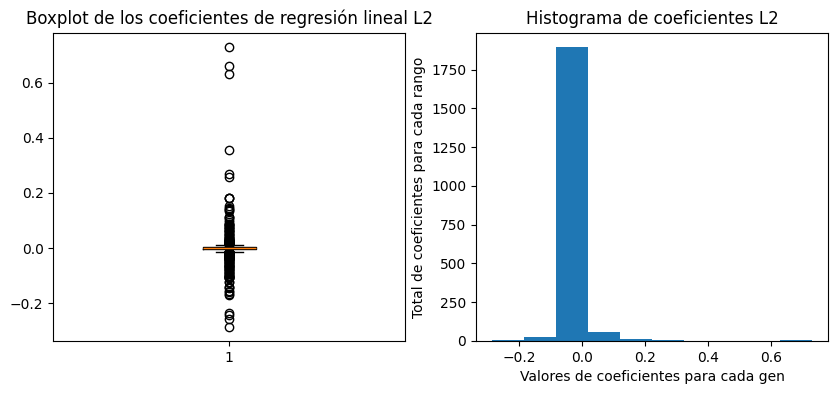

In [97]:
# Graficamos los coeficientes calculados
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_ridge.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal L2')
plt.subplot(1, 2, 2)
plt.hist(m_ridge.coef_,10)
plt.xlabel('Valores de coeficientes para cada gen')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes L2')
plt.show()

In [98]:
print(f'Mejor alpha encontrado: {m_ridge.alpha_}')
print(f'Coeficientes: {m_ridge.coef_}')

Mejor alpha encontrado: 4.641588833612772
Coeficientes: [-0.09116108  0.00339533  0.01864602 ...  0.26634782 -0.14551376
 -0.10169969]


In [99]:
# Supongamos que 'm_ridge' es tu modelo de regresión Ridge ya entrenado.
# m_ridge.coef_ contiene los coeficientes del modelo, que representan el peso o la importancia
# que el modelo ha asignado a cada variable independiente.
# Calculamos el porcentaje de variables que han sido "canceladas" por el modelo.
# "Canceladas" significa que sus coeficientes son cero o están muy cerca de cero, lo que indica
# que el modelo considera que no tienen mucha importancia.
porcentaje_canceladas = (len(m_ridge.coef_[np.abs(m_ridge.coef_) == 0]) /
                         len(m_ridge.coef_)) * 100
# Imprimimos el porcentaje de variables canceladas, redondeado a dos decimales.
print(f'El porcentaje de variables canceladas es: {round(porcentaje_canceladas, 2)}%')
# Calculamos el número de variables que el modelo está utilizando realmente.
# Estas son las variables cuyos coeficientes no son cero (o muy cercanos a cero),
# lo que significa que el modelo considera que tienen algún impacto en la predicción.
num_variables_usadas = len(m_ridge.coef_[np.abs(m_ridge.coef_) > 0])
# Imprimimos el número de variables que el modelo utiliza.
print(f'El modelo utiliza {num_variables_usadas} variables.')

El porcentaje de variables canceladas es: 13.7%
El modelo utiliza 1720 variables.


In [100]:
get_metrics(yhat_ridge, y_test, yhat_train_ridge, y_train)

,R2,Median AE,MAPE
Train set,0.996618,0.004985,0.702954
Test set,0.975844,0.204039,2.325756
Diferencia,-0.020774,0.199054,1.622803
